## Project Description:

#### General Instruction
- There will be two datasets for this project—one for classification models and the second for regression models. 
- Read data into Jupyter notebook use pandas to import data into a data frame. 
- Your submission should be commented on appropriately. Use the markdown cells in the iPython notebook to prepare your final report. 
- Fifty percent of the grade is based on your Python code submission. The other 50 percent of your grade is based on the evaluation score of the prediction. 
- The exam should be syntax error-free. Run your code before the final submission. 

#### Required Tasks
- Explore each data set using different descriptive and plotting methods. 
- Explore each dataset, check for missing data and apply proper data imputation methods. 
- Apply the same preprocessing techniques on the classification_test and regression_test. Note that these two datasets don't have target columns. 
- Scale each dataset. Explain your choice of data scaling method. 
- Apply clustering methods discussed in class to study the structure of each dataset. Discuss how the outcome of clustering will help you better understand the structure of data. Provide result interpretation for each clustering model. 
- Regression dataset: Apply all the regression models you have learned in this class. Discuss the results and outcomes. Models with hyperparameters explain how you find the best value of the hyperparameters. 
- Find the best regression model among the list of models trained on the regression_train dataset. Use this model to predict the target values of the regression_test. 
- Classification dataset: Apply all the classification models you have learned in this course. Discuss the results and outcomes. Discuss the choice of evaluation method and how it helps you find the best values of the model hyperparameters. 
- Find the best classification model among the list of models trained on the classification_train dataset. Use this model to predict the target values of the classification_test. 


#### Devliverable
Submit ONLY the iPython notebook or the .py file of your work. Use the following frame for your submission. Please don't remove the headers in the following structure. 

Make sure to list the name and student id of all the group members in your iPython notebook file. 

#### Rubric
| Descriptio | Fair | Good | excelent |
|:-----------|:------|:------|:----------|
|Preprocessing|Demonstrate limited understanding of preprocessing steps | Demonstrate a moderate ability to find a way to apply the preprocessing step to prepare the dataset for Machine learning models | Demonstrate the ability to choose the appropriate preprocessing model to prepare the dataset |
|learning model | Demonstrate limited understanding of methods used to train learning models | Demonstrate the ability to understand techniques used to train learning models with some effectiveness. This includes optimization algorithms, initialization, regularization, and hyperparameter search methods | Demonstrate ability to understand and apply various algorithms as well as initialization, regularization, and hyperparameter search methods |
|Final prediction |Demonstrate limited understanding of strategies to structure and end to end machine learning project | Demonstrate ability to understand classic ML strategies such as error analysis, data split, data collection and evaluation metric selection with some effectiveness | Demonstrates ability to structure the project and apply methods such as error analysis, data split, data collection, design a labeling process and select proper evaluation metrics to improve performance.

# Regression

### Data preparation


DATASET COLUMNS
Index(['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rented Bike Count'],
      dtype='object')
TOP 20 ROWS
    Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0   23.0             3.8         83.0               1.1             390.0   
1   14.0            24.0         47.0               2.3             520.0   
2   19.0            -7.1         33.0               2.0            1887.0   
3   12.0            12.3         97.0               0.8             238.0   
4    4.0             3.6         70.0               0.8            1934.0   
5   19.0            -1.5         32.0               2.5            2000.0   
6   23.0            27.0         78.0               1.6            1609.0   
7    9.0            20.8         64.0               1.1            1205.0

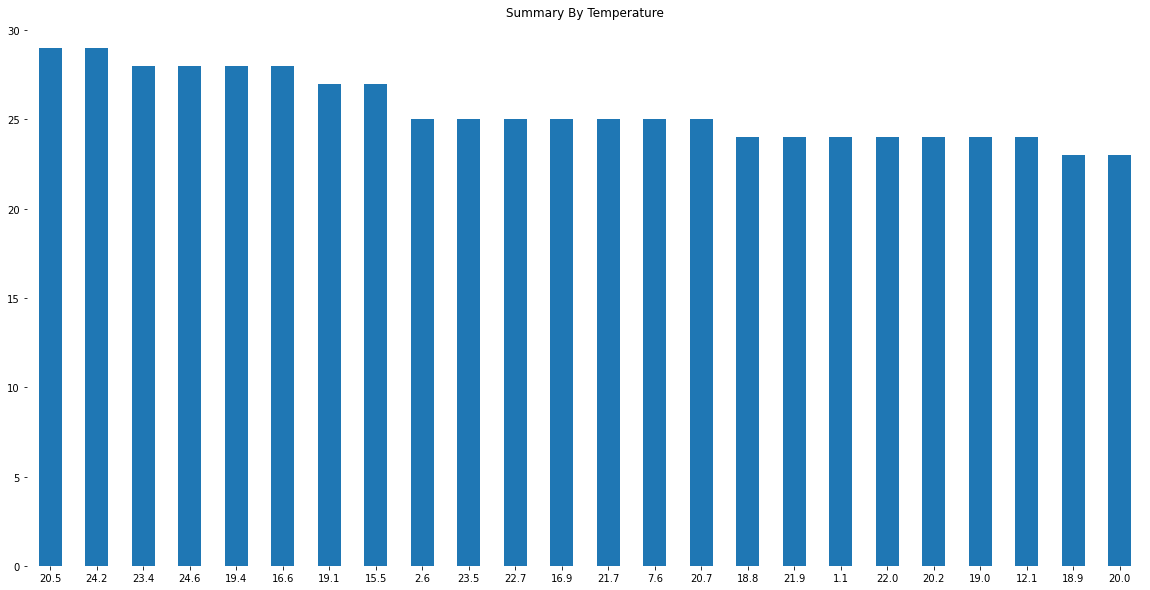

In [47]:
# importing main libraries
import pandas as pd
# getting the dataset
file = "train_regression.csv"
path = "~/Desktop/pythonproj/" #change this
Data = pd.read_csv(path + file)
# data
print(f'''
DATASET COLUMNS
{Data.columns}''')
print("TOP 20 ROWS")
print(Data.head(20))
# data information
print("DATA INFO")
print(Data.info())
print("DATA DISCRIPTION")
print(Data.describe())
# checking for null values and non-null values
null = 0
not_null =0
# counting all null and non-null values in the whole dataset
for col in Data.columns:
    for dat in Data[col].isnull():
        if dat == "True":
            null = null +1
        else:
            not_null = not_null + 1
print(f"Null values: {null} and Non-Null values: {not_null}")
#handling missing data
#import numpy as np
import numpy as np
# lets fix null values with a 0 if they exist
NUn=Data.fillna(0)
# remove using NaN values if they exist
Data.dropna(how = 'all')
#import matplotlib for graph ploting
import matplotlib.pyplot as plt
# sort by TYPE
type_ct = pd.value_counts(Data['Temperature(C)'])

# plot the data
plt.axes(frameon=0) # reduce chart junk
print("BAR GRAPH")
type_ct[:20].plot(kind='bar', rot=0, title="Summary By Temperature", figsize=(20,10)).grid(False)
plt.show()

### Regression model training

In [103]:
#split dataset in features and target variable
feature_cols = ['Temperature(C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)']
X = NUn[feature_cols] # Features
y = NUn['Rented Bike Count'] # Target variable
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/home/venom/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Regression prediction

In [104]:
#Calculating the acuracy
print("Accuracy ",logreg.score(X_test, y_test))

Accuracy  0.02678027997565429


# Classification

### Data preparation

DATA SAMPLES
    Age Sex   ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA    GGT  PROT  \
0    39   f  46.4   59.2   14.1   18.9   4.5   7.90  4.55   61.0   14.5  77.3   
1    37   m  46.1   44.3   42.7   26.5   6.4  10.86  5.05   74.0   22.2  73.1   
2    32   m  50.9   65.5   23.2   21.2   6.9   8.69  4.10   83.0   13.7  71.3   
3    46   f  36.7   62.3   10.8   17.4   3.7   6.17  4.07   67.0   15.1  69.0   
4    56   m  23.0  105.6    5.1  123.0  43.0   1.80  2.40   62.7   35.9  62.8   
5    33   m  46.7   88.3   23.4   23.9   7.8   9.42  4.62   78.0   29.5  74.3   
6    74   m  20.3   84.0   22.8   43.0   5.7   4.91  3.19   52.0  218.3  47.8   
7    32   f  39.9   35.2   22.0   29.8   6.3   8.16  4.37   60.0    4.5  72.5   
8    42   f  38.7   64.1   35.9   27.8   6.0   8.18  4.87   64.0   15.2  72.1   
9    53   m  41.7   45.3   23.2   25.1  10.8   5.68  5.78  119.0  114.9  67.9   
10   51   f  37.0    NaN  164.0   70.0   9.0   3.99  4.20   67.0   43.0  72.0   
11   50   m  44

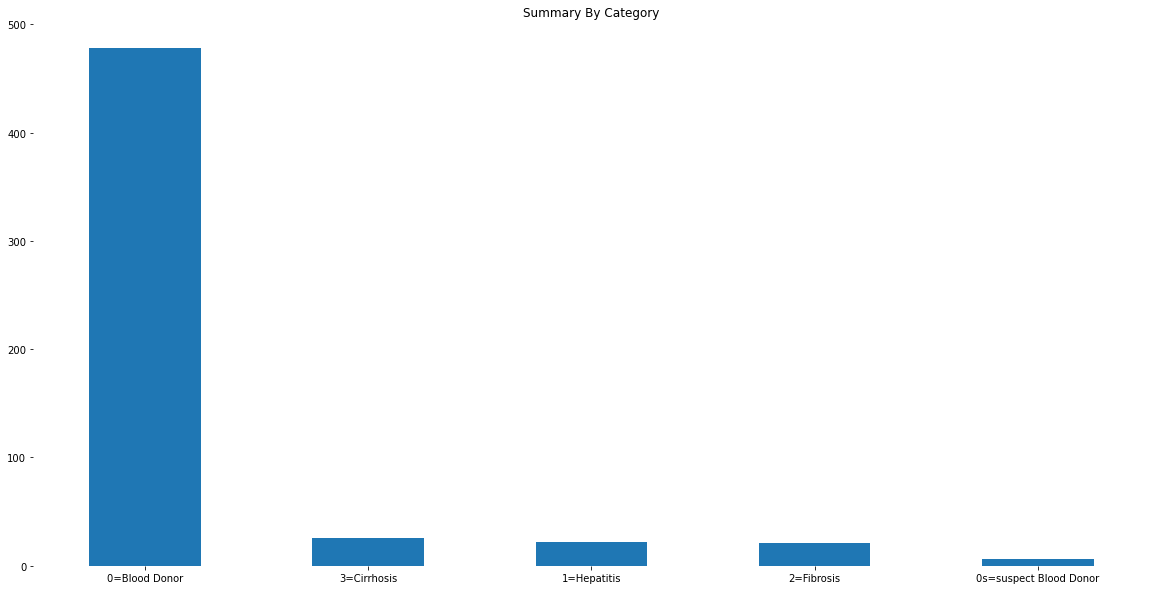

In [ ]:
# importing pandas as pd
import pandas as pd
#Loading data
#importing datasets  
path = "~/Desktop/pythonproj/"
file = "train_classification.csv"
data= pd.read_csv(path + file)
# data sample results
print("DATA SAMPLES")
print(data.head(20))
# data columns
print("DATA COLUMNS")
print(data.columns)
# data information
print("DATA INFO")
print(data.info())
print("DATA DISCRIPTION")
print(data.describe())
# checking for null values and non-null values
null = 0
not_null =0
# counting all null and non-null values in the whole dataset
for col in data.columns:
    for dat in data[col].isnull():
        if dat == "True":
            null = null +1
        else:
            not_null = not_null + 1
print(f"Null values: {null} and Non-Null values: {not_null}")
#handling missing data
#import numpy as np
import numpy as np
# lets fix null values with a 0 if they exist
NUN=data.fillna(0)
# remove using NaN values if they exist
data.dropna(how = 'all')
#import matplotlib for graph ploting
import matplotlib.pyplot as plt
# sort by TYPE
type_ct = pd.value_counts(data['Category'])

# plot the data
plt.axes(frameon=0) # reduce chart junk
print("BAR GRAPH")
type_ct[:20].plot(kind='bar', rot=0, title="Summary By Category", figsize=(20,10)).grid(False)
plt.show()

### Classification model training

Cateory RATE PER ERROR RATE


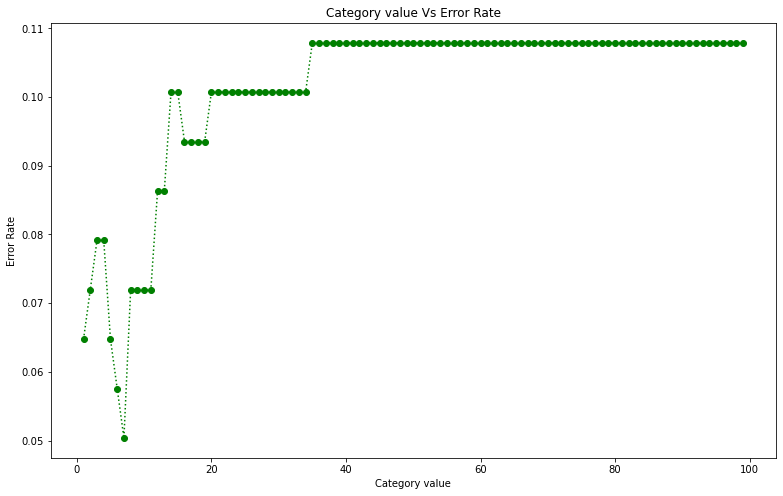

In [ ]:
# importing sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import plot_confusion_matrix
x = NUN.drop(['Category', 'Sex'],axis=1)
y = NUN.Category
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = True, test_size = 0.25)
error_rate=[]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(13,8))
plt.plot(range(1,100), error_rate, linestyle = 'dotted', marker = 'o',color = 'g')
plt.xlabel('Category value')
plt.ylabel('Error Rate')
plt.title('Category value Vs Error Rate')
print("Cateory RATE PER ERROR RATE")
plt.show()

### Classification prediction

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
 # dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
 
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print("Accuracy: ",+accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
print("CONFUSION MATRIX")
print(cm)
# getting the dataset
tfile = "test_classification.csv"
tpath = "~/Desktop/pythonproj/"
tdata = pd.read_csv(tpath + tfile)
tdata.head(4)

Accuracy:  0.9136690647482014
CONFUSION MATRIX
[[114   1   2   1   0]
 [  0   0   0   0   2]
 [  2   0   3   0   1]
 [  1   0   1   5   0]
 [  0   0   0   1   5]]


,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,36,m,47.8,89.0,48.5,38.4,8.6,8.26,5.62,96.0,21.9,76.2
1,56,f,45.1,79.1,39.0,30.5,5.2,6.47,5.10,64.0,145.3,66.7
2,51,m,45.9,66.7,31.8,28.1,9.0,10.08,5.61,85.0,36.2,73.0
3,55,m,44.7,71.6,22.9,22.1,5.5,6.82,4.61,105.0,59.2,72.7


In [26]:
import csv
NaNdata = tdata.fillna(0)
arr1 = list(NaNdata['ALT'].iloc[0:11])
arr2  = list(NaNdata['ALB'].iloc[11:22])
arr3  = list(NaNdata['PROT'].iloc[0:11])
test_da = nm.array([arr1,arr2, arr3])
print(test_da)
#test_da = test_da.reshape()
predicT = gnb.predict(test_da)
print(predicT)

[[48.5 39.  31.8 22.9 27.8 27.8 14.9 13.7 25.9 28.5 34.3]
 [41.2 38.3 40.  41.  42.6 35.2 37.6 47.6 40.  35.  31.4]
 [76.2 66.7 73.  72.7 74.5 77.3 77.1 65.2 70.8 57.  74.5]]
['3=Cirrhosis' '1=Hepatitis' '1=Hepatitis']
